In [44]:
## tools

from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper
from dotenv import load_dotenv
load_dotenv()
import os
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_groq import ChatGroq

from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [45]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=4, doc_content_chars_max=1000)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv, description="Arxiv query tool")
print(arxiv.name)

arxiv


In [46]:
arxiv.invoke("Federated Learning with Flower")

"Published: 2023-10-23\nTitle: Serverless Federated Learning with flwr-serverless\nAuthors: Sanjeev V. Namjoshi, Reese Green, Krishi Sharma, Zhangzhang Si\nSummary: Federated learning is becoming increasingly relevant and popular as we\nwitness a surge in data collection and storage of personally identifiable\ninformation. Alongside these developments there have been many proposals from\ngovernments around the world to provide more protections for individuals' data\nand a heightened interest in data privacy measures. As deep learning continues\nto become more relevant in new and existing domains, it is vital to develop\nstrategies like federated learning that can effectively train data from\ndifferent sources, such as edge devices, without compromising security and\nprivacy. Recently, the Flower (\\texttt{Flwr}) Python package was introduced to\nprovide a scalable, flexible, and easy-to-use framework for implementing\nfederated learning. However, to date, Flower is only able to run syn

In [47]:
api_wrapper_wikipedia = WikipediaAPIWrapper(top_k_results=4, doc_content_chars_max=1000)
wikipedia = WikipediaQueryRun(api_wrapper=api_wrapper_wikipedia, description="Wikipedia query tool")
wikipedia.name

'wikipedia'

In [49]:
wikipedia.invoke("Federated Learning with Flower")

'Page: Federated Learning of Cohorts\nSummary: Federated Learning of Cohorts (FLoC) is a type of web tracking. It groups people into "cohorts" based on their browsing history for the purpose of interest-based advertising. FLoC was being developed as a part of Google\'s Privacy Sandbox initiative, which includes several other advertising-related technologies with bird-themed names.:\u200a48\u200a Despite "federated learning" in the name, FLoC does not utilize any federated learning.\nGoogle began testing the technology in Chrome 89 released in March 2021 as a replacement for third-party cookies. By April 2021, every major browser aside from Google Chrome that is based on Google\'s open-source Chromium platform had declined to implement FLoC. The technology was criticized on privacy grounds by groups including the Electronic Frontier Foundation and DuckDuckGo, and has been described as anti-competitive; it generated an antitrust response in multiple countries as well as questions about G

In [50]:
tavily = TavilySearchResults()


In [51]:
tavily.invoke("Which stock should i buy today in the Indian market?")

[{'title': "Today's Stock Market Recommendation, Stock Call, Stock Pick, BSE ...",
  'url': 'https://www.thehindubusinessline.com/markets/todays-pick/',
  'content': "### [Stock to buy today: CIE Automotive India (₹530.65): BUY](https://www.thehindubusinessline.com/portfolio/technical-analysis/pf-todays-pick/stock-to-buy-today-cie-automotive-india-53065-buy/article68203610.ece)\n\n![bl-premium-article-image](https://assetsbl.thehindubusinessline.com/theme/images/bl-online/1x1_spacer.png) [...] ![](https://www.thehindubusinessline.com/economy/macro-economy/z7s004/article65944872.ece/alternates/LANDSCAPE_320/filler784)\n\n## [Stock to buy today: Indian Overseas Bank (₹74.42): BUY bl-premium-article-image](https://www.thehindubusinessline.com/portfolio/technical-analysis/stock-to-buy-today-28-may-2024-indian-overseas-bank-rs-74/article68221337.ece) [...] ### [Stock to buy today: Indian Bank (₹575.45): BUY](https://www.thehindubusinessline.com/portfolio/technical-analysis/pf-todays-pick/st

In [52]:
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")

In [53]:
## combine all these tools in the 


In [54]:
tools = [arxiv, wikipedia, tavily]
print("Tools initialized successfully.")

Tools initialized successfully.


In [55]:
llm = ChatGroq(
    model="qwen-qwq-32b",
    temperature=0.1,
    max_tokens=4000,
    verbose=False
)

In [56]:
print(llm.invoke("What is Machine Learning? "))

content='\n<think>\nOkay, so I need to explain what machine learning is. Let me start by recalling what I know. Machine learning is a part of artificial intelligence, right? It\'s about machines learning from data without being explicitly programmed. Hmm, but how exactly does that work?\n\nI remember hearing terms like algorithms, models, and training data. Maybe I should break it down into parts. First, the basic idea: instead of writing code to perform a task, you feed data to a machine, and it learns to do the task by itself. But how does that process actually happen?\n\nThere are different types of machine learning, like supervised, unsupervised, and reinforcement learning. Supervised learning uses labeled data, where each example has an input and an output. The algorithm learns to map inputs to outputs. For example, predicting house prices based on features like size and location. The model is trained on past data where the correct answers are known.\n\nUnsupervised learning is wh

In [57]:
llm_with_tools = llm.bind_tools(tools=tools)

In [58]:
llm_with_tools.invoke("Whta is todays recent news on AI")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_zpfm', 'function': {'arguments': '{"query":"today\'s recent news on AI"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 158, 'prompt_tokens': 325, 'total_tokens': 483, 'completion_time': 0.366560651, 'prompt_time': 0.02659129, 'queue_time': 0.121139383, 'total_time': 0.393151941}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_a91d9c2cfb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--46f834a2-09a2-424e-9ef3-0f0e5b522652-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': "today's recent news on AI"}, 'id': 'call_zpfm', 'type': 'tool_call'}], usage_metadata={'input_tokens': 325, 'output_tokens': 158, 'total_tokens': 483})

In [59]:
llm_with_tools.invoke("Whta is latest research related to Human activity recognition using Federated Learning?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_sm0e', 'function': {'arguments': '{"query":"Human Activity Recognition Federated Learning"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 617, 'prompt_tokens': 331, 'total_tokens': 948, 'completion_time': 1.450700067, 'prompt_time': 0.054632688, 'queue_time': 1.3972022139999998, 'total_time': 1.505332755}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_a91d9c2cfb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--5bf5541b-a3ad-443c-9753-d0013778b55b-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'Human Activity Recognition Federated Learning'}, 'id': 'call_sm0e', 'type': 'tool_call'}], usage_metadata={'input_tokens': 331, 'output_tokens': 617, 'total_tokens': 948})

In [60]:
llm_with_tools.invoke("Who is Virat Kohli?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_e4dz', 'function': {'arguments': '{"query":"Virat Kohli"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 333, 'prompt_tokens': 323, 'total_tokens': 656, 'completion_time': 0.817265631, 'prompt_time': 0.025258863, 'queue_time': 0.160884869, 'total_time': 0.842524494}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_512a3da6bb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--08042723-25a5-4f8f-a445-ae4d66a2d9dd-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Virat Kohli'}, 'id': 'call_e4dz', 'type': 'tool_call'}], usage_metadata={'input_tokens': 323, 'output_tokens': 333, 'total_tokens': 656})

# Workflow

In [61]:
## workflow

class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]   # will append all the messages and connvert to type dict



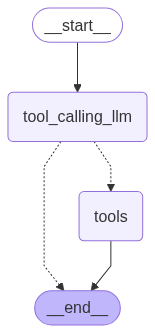

In [62]:
def tool_calling_llm(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))


## edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm", tools_condition)
builder.add_edge("tools", END)

graph_compile = builder.compile()
display(Image(graph_compile.get_graph().draw_mermaid_png()))

In [63]:
messages=graph_compile.invoke({"messages": "What is the latest research related to Human activity recognition using Federated Learning?"})
for m in messages["messages"]:
    print(m.pretty_print())

================================ Human Message =================================

What is the latest research related to Human activity recognition using Federated Learning?
None
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_wyyw)
 Call ID: call_wyyw
  Args:
    query: Human Activity Recognition Federated Learning
None
================================= Tool Message =================================
Name: arxiv

Published: 2021-03-31
Title: Semi-supervised Federated Learning for Activity Recognition
Authors: Yuchen Zhao, Hanyang Liu, Honglin Li, Payam Barnaghi, Hamed Haddadi
Summary: Training deep learning models on in-home IoT sensory data is commonly used to
recognise human activities. Recently, federated learning systems that use edge
devices as clients to support local human activity recognition have emerged as
a new paradigm to combine local (individual-level) and global (group-level)
models. This approach provides better

In [ ]:
messages1 =graph_compile.invoke({"messages":"1706.03762"})
for m in messages1["messages"]:
    print(m.pretty_print())

================================ Human Message =================================

1706.03762
None
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_39h6)
 Call ID: call_39h6
  Args:
    query: 1706.03762
None
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, based
solely on attention mechanisms, dispensing with recurrence and convolutions
entirely. Experiments on two machine translation tasks show th

In [ ]:
messages2 =graph_compile.invoke({"messages":"Who is Elon Musk"})
for m in messages2["messages"]:
    print(m.pretty_print())

================================ Human Message =================================

Who is Elon Musk
None
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_tyxy)
 Call ID: call_tyxy
  Args:
    query: Elon Musk
None
================================= Tool Message =================================
Name: wikipedia

Page: Elon Musk
Summary: Elon Reeve Musk ( EE-lon; born June 28, 1971) is a businessman known for his leadership of Tesla, SpaceX, X (formerly Twitter) and the Department of Government Efficiency (DOGE). Musk has been considered the wealthiest person in the world since 2021; as of May 2025, Forbes estimates his net worth to be US$424.7 billion. 
Born to a wealthy family in Pretoria, South Africa, Musk emigrated in 1989 to Canada. He received bachelor's degrees from the University of Pennsylvania in 1997 before moving to California, United States, to pursue business ventures. In 1995, Musk co-founded the software company

In [ ]:
messages3 =graph_compile.invoke({"messages":"how to code a fibonacci series in python?"})
for m in messages3["messages"]:
    print(m.pretty_print())

================================ Human Message =================================

how to code a fibonacci series in python?
None
================================== Ai Message ==================================

To code a Fibonacci series in Python, you can use a loop or recursion. Here's a simple iterative approach using a loop:

```python
def fibonacci_series(n):
    # Initialize the first two numbers
    a, b = 0, 1
    series = []
    for _ in range(n):
        series.append(a)
        a, b = b, a + b  # Update the values to next pair
    return series

# Example usage:
n = 10  # Number of terms to generate
print(fibonacci_series(n))  # Output: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
```

### Explanation:
1. **Function Definition**: `fibonacci_series(n)` generates the first `n` numbers in the Fibonacci sequence.
2. **Initialization**: `a` starts at 0 (first term), `b` at 1 (second term).
3. **Loop**: Appends the current term (`a`) to the list, then updates `a` and `b` to the next pair in 

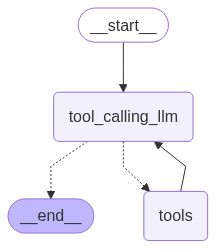

In [87]:
def tool_calling_llm(state: State):
    print("State in tool_calling_llm:", state)
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

builder2 = StateGraph(State)
builder2.add_node("tool_calling_llm", tool_calling_llm)
builder2.add_node("tools", ToolNode(tools))


## edges
builder2.add_edge(START, "tool_calling_llm")
builder2.add_conditional_edges("tool_calling_llm", tools_condition)
builder2.add_edge("tools", "tool_calling_llm")

graph_compile2 = builder2.compile()
display(Image(graph_compile2.get_graph().draw_mermaid_png()))

In [137]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains import LLMChain
prompt =ChatPromptTemplate.from_template("""
    Summarize the context provided in english and german translation of it. 
    The structure should be as English:(English summary) German:(German translation of english summary).
    Understand the crucial information given in the context and then provide a final answer only as structured above.
    <context>
    {context}
    </context>
    Question: {input}""")

def response_llm(question: str, message):
    #prompt = prompt.format_messages(context=message, input=question)
    llm_chain = LLMChain(llm=llm, prompt=prompt, verbose=False)
    response = llm_chain.run(context=message, input=question)

    # Print the response
    #print(f"Processed response from LLM:\n {response}")
    return response
    

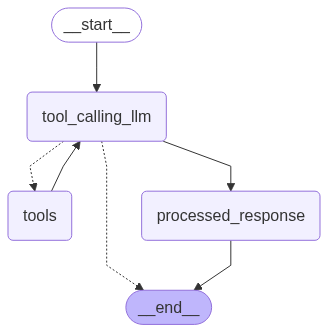

In [138]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

def tool_calling_llm(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

def processed_response(state:State):
    #print("State in processed_response:", state["messages"][1]) # ai message
    #print("State in processed_response:", state["messages"][0])  # message history
    return {"message": response_llm(question=state["messages"][0].content, message=state["messages"][1].content)}

builder3 = StateGraph(State)
builder3.add_node("tool_calling_llm", tool_calling_llm)
builder3.add_node("tools", ToolNode(tools))
builder3.add_node("processed_response", processed_response)


## edges
builder3.add_edge(START, "tool_calling_llm")
builder3.add_conditional_edges("tool_calling_llm", tools_condition)
builder3.add_edge("tools", "tool_calling_llm")
builder3.add_edge("tool_calling_llm", "processed_response")
builder3.add_edge( "processed_response",END)

graph_compile3 = builder3.compile()
display(Image(graph_compile3.get_graph().draw_mermaid_png()))

In [139]:
messages4 =graph_compile3.invoke({"messages":"what is federated learning?"})
for m in messages4["messages"]:
    print(m.pretty_print())
#print(messages4)  # This will print the final processed response from the LLM

================================ Human Message =================================

what is federated learning?
None
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_ap9z)
 Call ID: call_ap9z
  Args:
    query: federated learning
None
================================= Tool Message =================================
Name: wikipedia

Page: Federated learning
Summary: Federated learning (also known as collaborative learning) is a machine learning technique in a setting where multiple entities (often called clients) collaboratively train a model while keeping their data decentralized, rather than centrally stored. A defining characteristic of federated learning is data heterogeneity. Because client data is decentralized, data samples held by each client may not be independently and identically distributed.
Federated learning is generally concerned with and motivated by issues such as data privacy, data minimization, and data access

In [ ]:
messages5 =graph_compile2.invoke({"messages":"what is fibonacci series and Which stock should i buy today in Indian Market?"})
for m in messages5["messages"]:
    print(m.pretty_print())

================================ Human Message =================================

what is fibonacci series and Which stock should i buy today in Indian Market?
None
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_3w87)
 Call ID: call_3w87
  Args:
    query: Fibonacci number
  tavily_search_results_json (call_e0rz)
 Call ID: call_e0rz
  Args:
    query: top performing stocks in Indian market today
None
================================= Tool Message =================================
Name: wikipedia

Page: Fibonacci sequence
Summary: In mathematics, the Fibonacci sequence is a sequence in which each element is the sum of the two elements that precede it. Numbers that are part of the Fibonacci sequence are known as Fibonacci numbers, commonly denoted Fn . Many writers begin the sequence with 0 and 1, although some authors start it from 1 and 1 and some (as did Fibonacci) from 1 and 2. Starting from 0 and 1, the sequence begins


In [82]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains import LLMChain
prompt =ChatPromptTemplate.from_template("""
    Summarize the context provided in english and german translation of it. 
    The structure should be as English:(English summary) German:(German translation of english summary).
    Understand the crucial information given in the context and then provide a final answer only as structured above.
    <context>
    {context}
    </context>
    Question: {input}""")

def response_llm(question: str):
    message =  graph_compile2.invoke({"messages": question})
    #for m in message["messages"]:
        #print(m.pretty_print())

    #prompt = prompt.format_messages(context=message, input=question)
    llm_chain = LLMChain(llm=llm, prompt=prompt, verbose=False)
    response = llm_chain.run(context=message, input=question)

    # Print the response
    print(f"Processed response from LLM:\n {response}")
    return response
    
    
    
    

In [83]:
answer = response_llm("Which stock should i buy today in Indian Market?")

Processed response from LLM:
 
<think>
Okay, let me tackle this query. The user is asking which stock to buy today in the Indian market. I need to look at the provided context to find the relevant info.

First, the context includes search results from The Hindu Business Line, Economic Times, INDmoney, and Groww. The AIMessage already summarized some recommendations. Let me parse that. 

The top picks mentioned are Amara Raja Energy & Mobility and Union Bank of India from The Hindu Business Line. UltraTech Cement is recommended by JM Financial with a target price. IRFC and Indian Overseas Bank are also highlighted. There's also mention of other stocks like Tata Motors and some pharma companies. 

I need to structure the summary in English first, then translate it into German. The user wants the structure as specified: English: [summary], German: [translation]. 

Wait, the key points are the top stocks with their names and reasons. The summary should list the main recommendations without

In [84]:
answer

'\n<think>\nOkay, let me tackle this query. The user is asking which stock to buy today in the Indian market. I need to look at the provided context to find the relevant info.\n\nFirst, the context includes search results from The Hindu Business Line, Economic Times, INDmoney, and Groww. The AIMessage already summarized some recommendations. Let me parse that. \n\nThe top picks mentioned are Amara Raja Energy & Mobility and Union Bank of India from The Hindu Business Line. UltraTech Cement is recommended by JM Financial with a target price. IRFC and Indian Overseas Bank are also highlighted. There\'s also mention of other stocks like Tata Motors and some pharma companies. \n\nI need to structure the summary in English first, then translate it into German. The user wants the structure as specified: English: [summary], German: [translation]. \n\nWait, the key points are the top stocks with their names and reasons. The summary should list the main recommendations without too much detail. 

In [86]:
import re

# Remove the content between <think> and </think>
cleaned_text = re.sub(r'<think>.*?</think>', '', answer, flags=re.DOTALL)

# Display the cleaned text
print(cleaned_text.strip())

English: Top recommended stocks in the Indian market today include Amara Raja Energy & Mobility (₹1,090.85) and Union Bank of India (₹142), based on technical analysis. UltraTech Cement (target price ₹13,500) is recommended by JM Financial due to strong Q4FY25 revenue growth (12.70% YoY) and profit. IRFC (₹146.41) and Indian Overseas Bank (₹74.42) are highlighted for their trading activity and upside potential. Other mentions include Mankind Pharma, Natco Pharma, and Tata Motors. Always verify current prices, analyze financial health, and consider consulting a financial advisor before investing.  
German: Top empfohlene Aktien auf dem indischen Markt heute umfassen Amara Raja Energy & Mobility (₹1.090,85) und Union Bank of India (₹142), basierend auf technischer Analyse. UltraTech Cement (Zielpreis ₹13.500) wird von JM Financial empfohlen, da es auf einen starken Umsatzwachstumm im Q4FY25 (12,70% YoY) und Gewinn baut. IRFC (₹146,41) und Indian Overseas Bank (₹74,42) werden aufgrund ihr

In [ ]:
res = dict{'messages': [HumanMessage(content='what is fibonacci series and how to code a fibonacci series in python?', 
                                     additional_kwargs={}, response_metadata={}, id='964fec28-80a6-4aea-a463-48b8a3f0ab2e'), 
                        AIMessage(content='The Fibonacci series is a sequence where each number is the sum of the two preceding ones, starting with 0 and 1. The sequence begins: 0, 1, 1, 2, 3, 5, 8, 13, etc.\n\n### How to code it in Python (iterative approach):\n```python\nn = int(input("Enter the number of terms: "))\na, b = 0, 1\nsequence = [a]\nfor _ in range(n - 1):\n    sequence.append(b)\n    a, b = b, a + b\nprint(sequence)\n```\n\n### Explanation:\n1. **Initialization**: Start with `a=0` (first term) and `b=1` (second term).\n2. **Loop**: For each term after the first two, calculate the next term as `a + b`, update `a` and `b`, and append to the list.\n3. **Output**: The list `sequence` contains the Fibonacci series up to the desired number of terms.\n\n### Recursive Approach (less efficient for large `n`):\n```python\ndef fibonacci(n):\n    if n <= 0:\n        return []\n    elif n == 1:\n        return [0]\n    sequence = [0, 1]\n    for i in range(2, n):\n        sequence.append(sequence[i-1] + sequence[i-2])\n    return sequence\n\nprint(fibonacci(int(input("Enter the number of terms: "))))\n```\n\n### Key Notes:\n- The iterative method is more efficient for large `n` due to recursion\'s exponential time complexity.\n- Adjust the starting values (0 and 1) if you prefer a different initial sequence.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 2041, 'prompt_tokens': 330, 'total_tokens': 2371, 'completion_time': 4.718402407, 'prompt_time': 0.019142413, 'queue_time': 0.125083852, 'total_time': 4.73754482}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_9faf42d81f', 'finish_reason': 'stop', 'logprobs': None}, id='run--2de88f82-d2a7-4545-ba32-e8c2897419b7-0', usage_metadata={'input_tokens': 330, 'output_tokens': 2041, 'total_tokens': 2371})]}


SyntaxError: invalid syntax (369426365.py, line 1)